In [6]:
import numpy as np
from analytics.main import Equation, Distribution
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec

import seaborn as sns

sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-white',)
sns.set_style("whitegrid", {'legend.frameon':True})

In [51]:
def build_ro_chart(ax, x, items, y_label, x_label):
    markerfacecolor='#DD8453'
    ax.plot(x, items, linewidth=linewidth, marker='X', markersize=8)
    ax.set_ylabel(y_label, fontsize=fontsize)
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tickfontsize)
    #ax.set_xticks([0.2, 0.6, 1.0, 1.4, 1.8])

### исследование метрик в зависимости от коэффициента загрузки

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
0.9999999999999999


/var/folders/51/xsy_132d0qn6cs7kbh37ynf40000gn/T/ipykernel_8625/2752615856.py:45: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


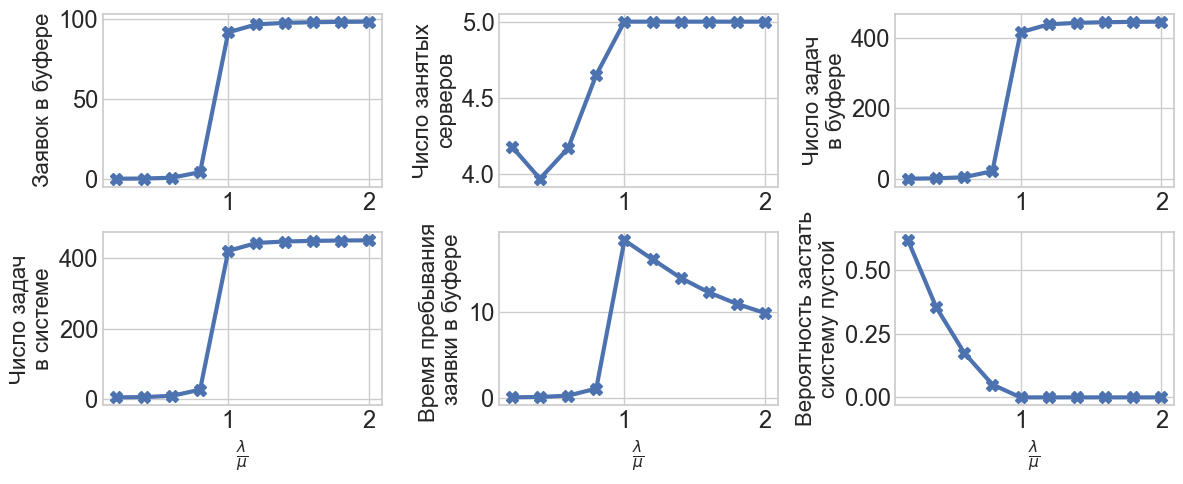

In [59]:
from functools import reduce

distrib_arr = [1 / 10 for i in range(0, 10)]

print(distrib_arr)
print(reduce(lambda a, b: a+b, distrib_arr))

distrib = Distribution([1 / 10 for i in range(0, 10)])
_mu = 5
M = 5

ro_res = []

for lamb in range(1, 11):
    eq = Equation(
        M,
        distrib,
        lamb,
        _mu,
        100
    )
    eq.build()
    eq.solve()

    metric = eq.calculate_metrics()
    ro_res.append(metric)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 5), constrained_layout=True)

fontsize=16
linewidth=3
markersize=10
tickfontsize=17

x = [i / _mu for i in range(1, 11)]


build_ro_chart(ax1, x, [item['avg_problems_in_buffer'] for item in ro_res], 'Заявок в буфере', '')
build_ro_chart(ax2, x, [item['busy_servers'] for item in ro_res], 'Число занятых\nсерверов', '')
build_ro_chart(ax3, x, [item['avg_tasks_in_buffer'] for item in ro_res], 'Число задач\nв буфере', '')
build_ro_chart(ax4, x, [item['avg_tasks_in_system'] for item in ro_res], 'Число задач\nв системе', r'$\frac{\lambda}{\mu}$')
build_ro_chart(ax5, x, [item['avg_problem_time_in_buffer'] for item in ro_res], 'Время пребывания \nзаявки в буфере', r'$\frac{\lambda}{\mu}$')
build_ro_chart(ax6, x, [item['system_is_empty'] for item in ro_res], 'Вероятность застать\nсистему пустой', r'$\frac{\lambda}{\mu}$')

fig.tight_layout()

# fig.legend(*ax6.get_legend_handles_labels(), loc='lower center', 
#            bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=20, frameon=True)

fig.savefig('ro_chart.png',  bbox_inches="tight")


### исследование метрик в зависимости от числа обслуживающих приборов

/var/folders/51/xsy_132d0qn6cs7kbh37ynf40000gn/T/ipykernel_8625/3463487082.py:40: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


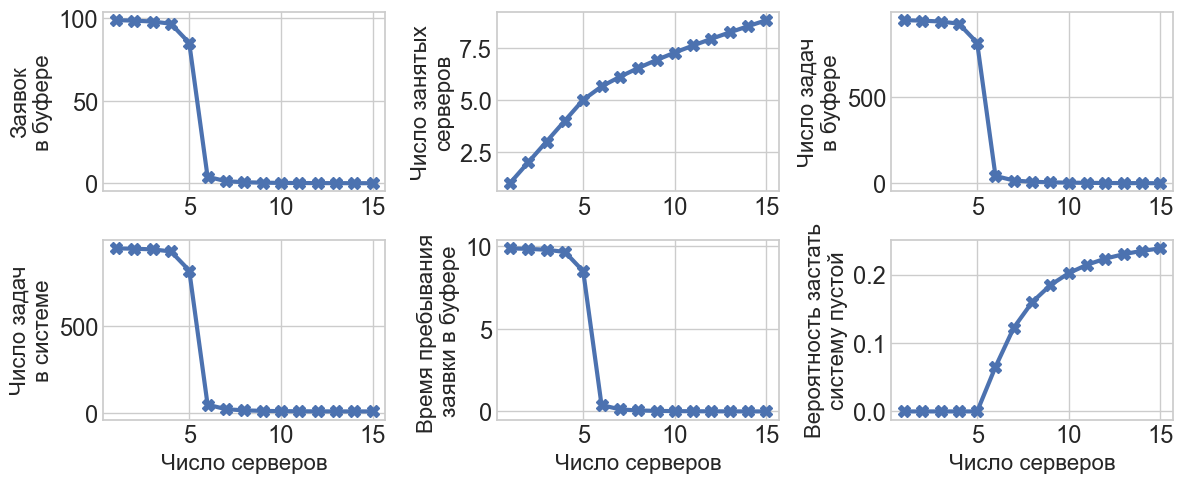

In [58]:
from functools import reduce

distrib = Distribution([1 / 20 for i in range(0, 20)])
_mu = 20
lamb = 10

servers_res = []

for m in range(1, 16):
    eq = Equation(
        m,
        distrib,
        lamb,
        _mu,
        100
    )
    eq.build()
    eq.solve()

    metric = eq.calculate_metrics()
    servers_res.append(metric)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 5), constrained_layout=True)

fontsize=16
linewidth=3
markersize=10
tickfontsize=17

x = [i for i in range(1, 16)]


build_ro_chart(ax1, x, [item['avg_problems_in_buffer'] for item in servers_res], 'Заявок\nв буфере', '')
build_ro_chart(ax2, x, [item['busy_servers'] for item in servers_res], 'Число занятых\nсерверов', '')
build_ro_chart(ax3, x, [item['avg_tasks_in_buffer'] for item in servers_res], 'Число задач\nв буфере', '')
build_ro_chart(ax4, x, [item['avg_tasks_in_system'] for item in servers_res], 'Число задач\nв системе', 'Число серверов')
build_ro_chart(ax5, x, [item['avg_problem_time_in_buffer'] for item in servers_res], 'Время пребывания \nзаявки в буфере', 'Число серверов')
build_ro_chart(ax6, x, [item['system_is_empty'] for item in servers_res], 'Вероятность застать\nсистему пустой', 'Число серверов')

fig.tight_layout()

# fig.legend(*ax6.get_legend_handles_labels(), loc='lower center', 
#            bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=20, frameon=True)

fig.savefig('servers_chart.png',  bbox_inches="tight")

### исследование метрик в зависимости от среднего числа задач в заявке

/var/folders/51/xsy_132d0qn6cs7kbh37ynf40000gn/T/ipykernel_8625/1943616440.py:42: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


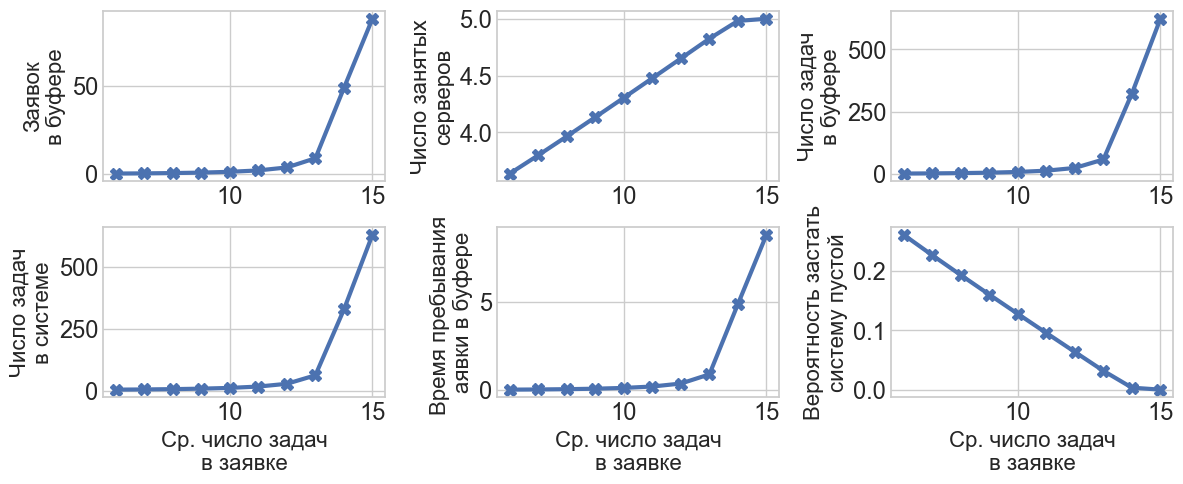

In [57]:
from functools import reduce

_mu = 15
lamb = 10
M = 5

servers_res = []

for d in range(6, 16):
    distrib = Distribution([1 / d for i in range(0, d)])
    
    eq = Equation(
        M,
        distrib,
        lamb,
        _mu,
        100
    )
    eq.build()
    eq.solve()

    metric = eq.calculate_metrics()
    servers_res.append(metric)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 5), constrained_layout=True)

fontsize=16
linewidth=3
markersize=10
tickfontsize=17

x = [i for i in range(6, 16)]


build_ro_chart(ax1, x, [item['avg_problems_in_buffer'] for item in servers_res], 'Заявок\nв буфере', '')
build_ro_chart(ax2, x, [item['busy_servers'] for item in servers_res], 'Число занятых\nсерверов', '')
build_ro_chart(ax3, x, [item['avg_tasks_in_buffer'] for item in servers_res], 'Число задач\nв буфере', '')
build_ro_chart(ax4, x, [item['avg_tasks_in_system'] for item in servers_res], 'Число задач\nв системе', 'Ср. число задач\nв заявке')
build_ro_chart(ax5, x, [item['avg_problem_time_in_buffer'] for item in servers_res], 'Время пребывания \nаявки в буфере', 'Ср. число задач\nв заявке')
build_ro_chart(ax6, x, [item['system_is_empty'] for item in servers_res], 'Вероятность застать\nсистему пустой', 'Ср. число задач\nв заявке')

fig.tight_layout()

# fig.legend(*ax6.get_legend_handles_labels(), loc='lower center', 
#            bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=20, frameon=True)

fig.savefig('tasks_in_customer_chart.png',  bbox_inches="tight")